# Weather Data Forecasting - Week 3

This notebook focuses on cleaning and preparing the weather dataset for forecasting.

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load the dataset
df = pd.read_csv('max_planck_weather_ts.csv')

# Display first few rows
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [35]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [36]:
# Convert Date Time to datetime format
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Extract year and add it as a new column
df['Year'] = df['Date Time'].dt.year

# Display unique years in the dataset
print('Years in the dataset:')
print(df['Year'].unique())

Years in the dataset:
[2009 2010 2011 2012 2013 2014 2015 2016 2017]


In [37]:
# Rename columns for better clarity
column_mapping = {
    'p (mbar)': 'pressure',
    'T (degC)': 'temperature',
    'Tpot (K)': 'potential_temperature',
    'Tdew (degC)': 'dew_point',
    'rh (%)': 'relative_humidity',
    'VPmax (mbar)': 'vapor_pressure_max',
    'VPact (mbar)': 'vapor_pressure_actual',
    'VPdef (mbar)': 'vapor_pressure_deficit',
    'sh (g/kg)': 'specific_humidity',
    'H2OC (mmol/mol)': 'water_vapor_concentration',
    'rho (g/m**3)': 'air_density',
    'wv (m/s)': 'wind_speed',
    'max. wv (m/s)': 'max_wind_speed',
    'wd (deg)': 'wind_direction'
}

df = df.rename(columns=column_mapping)
df.head()

,Date Time,pressure,temperature,potential_temperature,dew_point,relative_humidity,vapor_pressure_max,vapor_pressure_actual,vapor_pressure_deficit,specific_humidity,water_vapor_concentration,air_density,wind_speed,max_wind_speed,wind_direction,Year
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3,2009
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009


In [38]:
# Check for null values
print('Null values in each column:')
print(df.isnull().sum())

Null values in each column:
Date Time                    0
pressure                     0
temperature                  0
potential_temperature        0
dew_point                    0
relative_humidity            0
vapor_pressure_max           0
vapor_pressure_actual        0
vapor_pressure_deficit       0
specific_humidity            0
water_vapor_concentration    0
air_density                  0
wind_speed                   0
max_wind_speed               0
wind_direction               0
Year                         0
dtype: int64


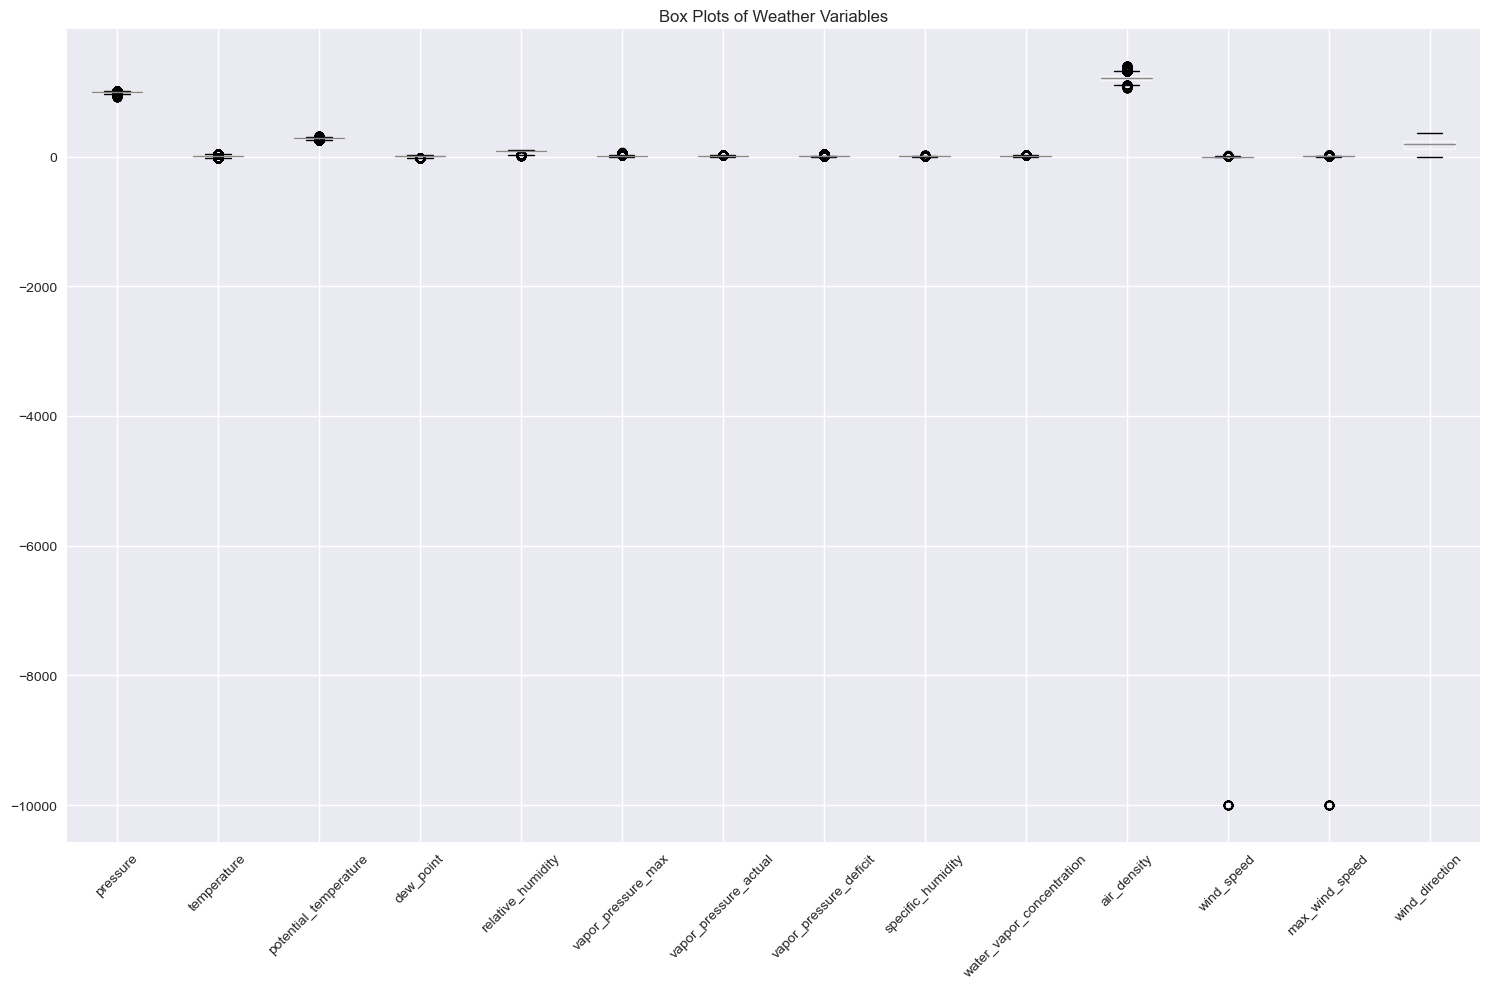

In [39]:
# Create visualizations to check for outliers and distributions
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Year')  # Exclude Year from visualization

# Create box plots for each numeric variable
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Weather Variables')
plt.tight_layout()
plt.show()

In [40]:
# Check min and max values for wind_speed and max_wind_speed
print('Wind Speed Min/Max:', df['wind_speed'].min(), df['wind_speed'].max())
print('Max Wind Speed Min/Max:', df['max_wind_speed'].min(), df['max_wind_speed'].max())

# Show rows with negative wind speeds
print(df[df['wind_speed'] < 0][['Date Time', 'wind_speed']].head())
print(df[df['max_wind_speed'] < 0][['Date Time', 'max_wind_speed']].head())

Wind Speed Min/Max: -9999.0 28.49
Max Wind Speed Min/Max: -9999.0 23.5
                 Date Time  wind_speed
343578 2015-07-13 09:10:00     -9999.0
343579 2015-07-13 09:20:00     -9999.0
343580 2015-07-13 09:30:00     -9999.0
343581 2015-07-13 09:40:00     -9999.0
343582 2015-07-13 09:50:00     -9999.0
                 Date Time  max_wind_speed
343577 2015-07-13 09:00:00         -9999.0
343578 2015-07-13 09:10:00         -9999.0
343579 2015-07-13 09:20:00         -9999.0
343580 2015-07-13 09:30:00         -9999.0
343581 2015-07-13 09:40:00         -9999.0


In [41]:
# Replace -9999.0 with NaN in wind_speed and max_wind_speed
df['wind_speed'] = df['wind_speed'].replace(-9999.0, np.nan)
df['max_wind_speed'] = df['max_wind_speed'].replace(-9999.0, np.nan)

# Drop rows where wind_speed or max_wind_speed is NaN
df_cleaned = df.dropna(subset=['wind_speed', 'max_wind_speed'])
print(df_cleaned[['wind_speed', 'max_wind_speed']].min())

wind_speed        0.0
max_wind_speed    0.0
dtype: float64


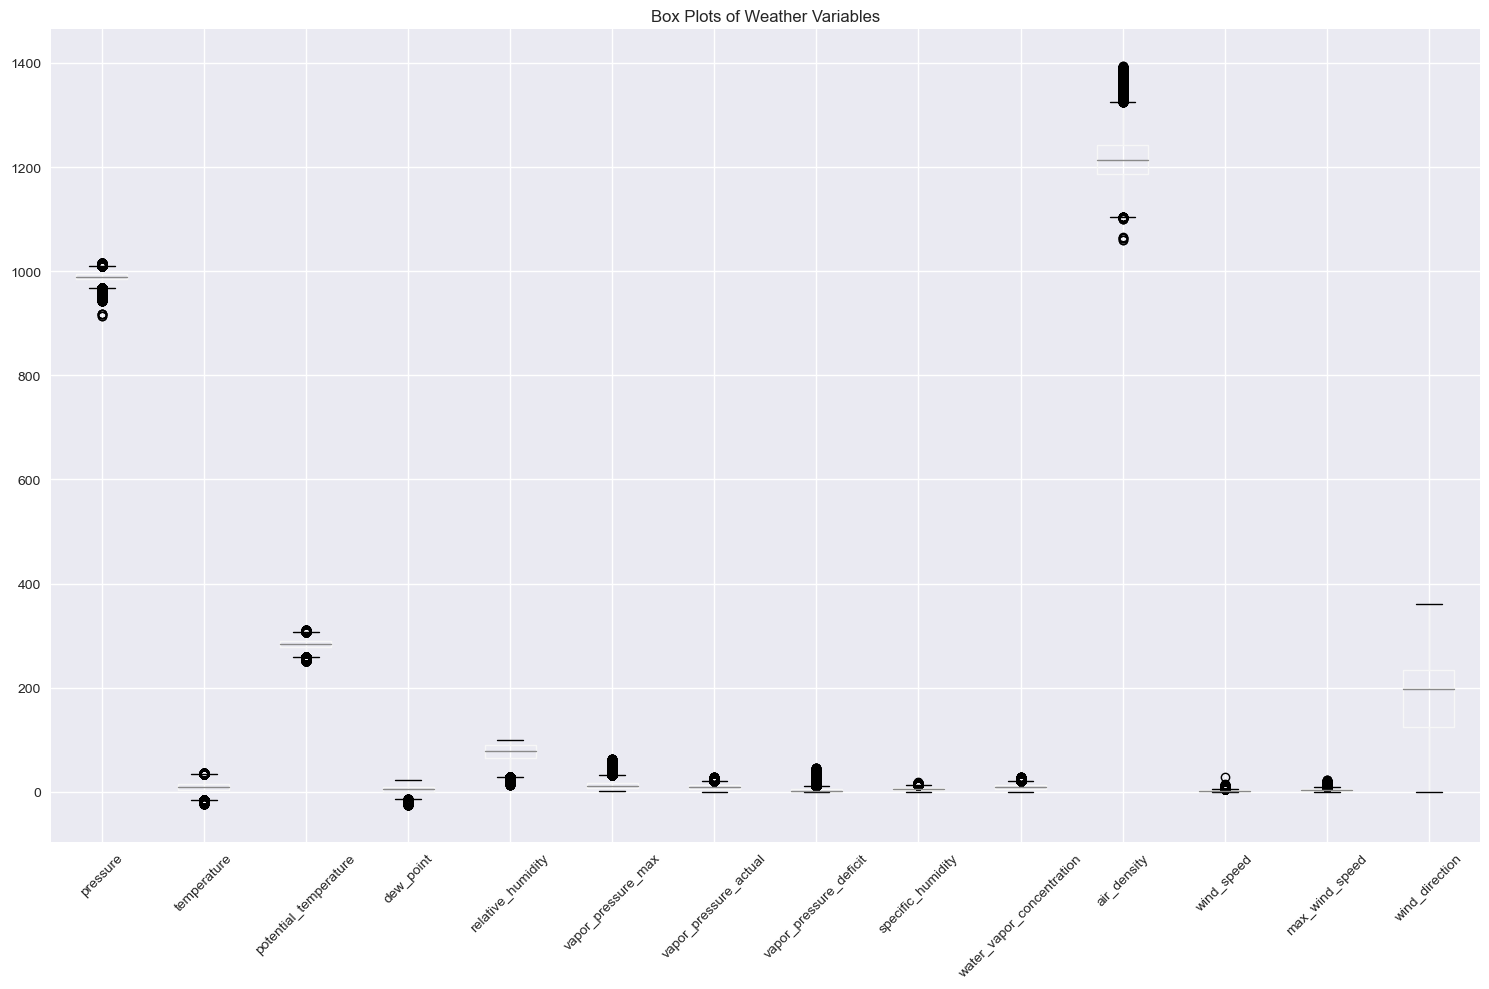

In [42]:
# Create visualizations to check for outliers and distributions
# Create boxplot for cleaned dataset
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Year')  # Exclude Year from visualization

# Create box plots for each numeric variable
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Weather Variables')
plt.tight_layout()
plt.show()

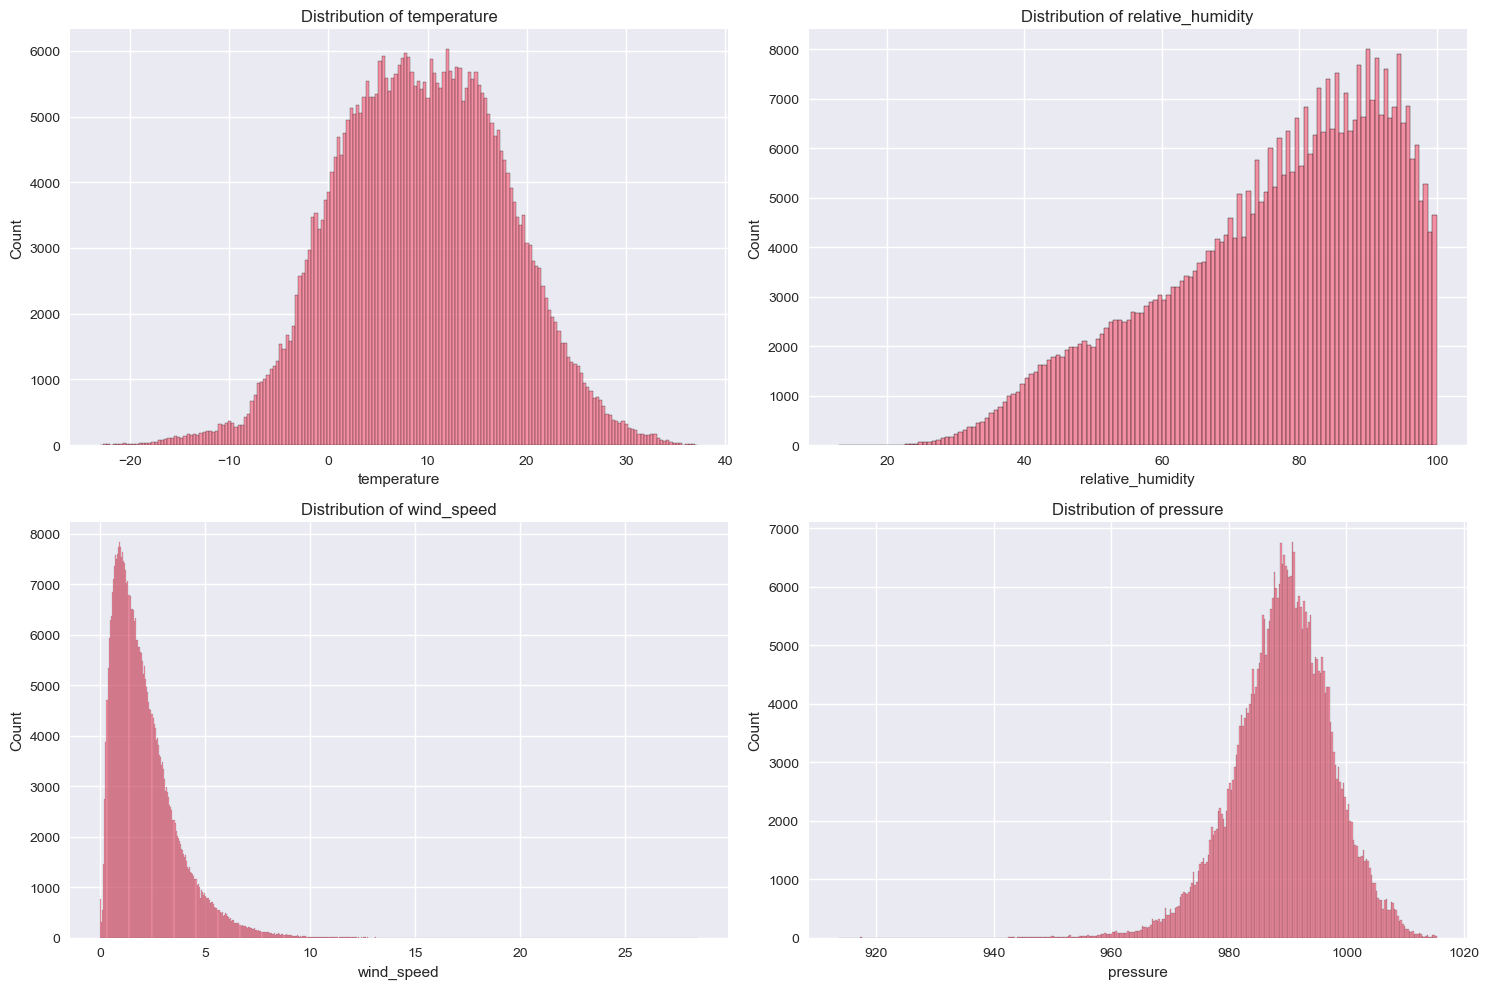

In [43]:
# Create histograms for key variables
key_variables = ['temperature', 'relative_humidity', 'wind_speed', 'pressure']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(key_variables):
    sns.histplot(data=df, x=var, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

In [44]:
# Normalize the numeric variables
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numeric columns for normalization
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Year')  # Exclude Year from normalization

# Create a copy of the dataframe for normalized values
df_normalized = df_cleaned.copy()

# Apply normalization
df_normalized[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Display the first few rows of normalized data
df_normalized.head()

,Date Time,pressure,temperature,potential_temperature,dew_point,relative_humidity,vapor_pressure_max,vapor_pressure_actual,vapor_pressure_deficit,specific_humidity,water_vapor_concentration,air_density,wind_speed,max_wind_speed,wind_direction,Year
0,2009-01-01 00:10:00,0.814939,0.248632,0.243662,0.334788,0.923033,0.037886,0.084272,0.004782,0.081679,0.082798,0.743213,0.070403,0.074468,0.423056,2009
1,2009-01-01 00:20:00,0.815430,0.242163,0.237241,0.326891,0.924182,0.036294,0.081003,0.004564,0.078843,0.079586,0.749349,0.049214,0.063830,0.378056,2009
2,2009-01-01 00:30:00,0.815037,0.240504,0.235594,0.326268,0.929925,0.035976,0.080639,0.004347,0.078276,0.079229,0.750666,0.012987,0.026809,0.476667,2009
3,2009-01-01 00:40:00,0.814840,0.243822,0.239052,0.331255,0.933372,0.036772,0.082819,0.004130,0.080545,0.081370,0.747523,0.023240,0.021277,0.550000,2009
4,2009-01-01 00:50:00,0.814840,0.244485,0.239546,0.331879,0.932223,0.036931,0.083182,0.004130,0.080545,0.081727,0.746954,0.021873,0.026809,0.595278,2009


In [45]:
# Set as index
df_cleaned.set_index('Date Time', inplace=True)

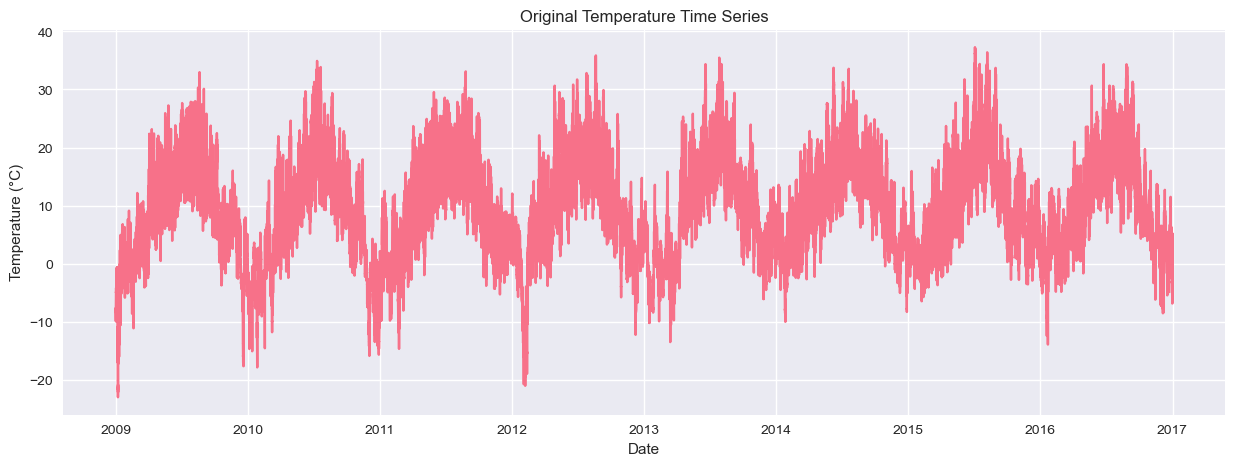

In [46]:
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned.index, df_cleaned['temperature'])
plt.title('Original Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [47]:
# Daily mean
df_daily = df_cleaned['temperature'].resample('D').mean()

# Weekly mean
df_weekly = df_cleaned['temperature'].resample('W').mean()

# Monthly mean
df_monthly = df_cleaned['temperature'].resample('M').mean()

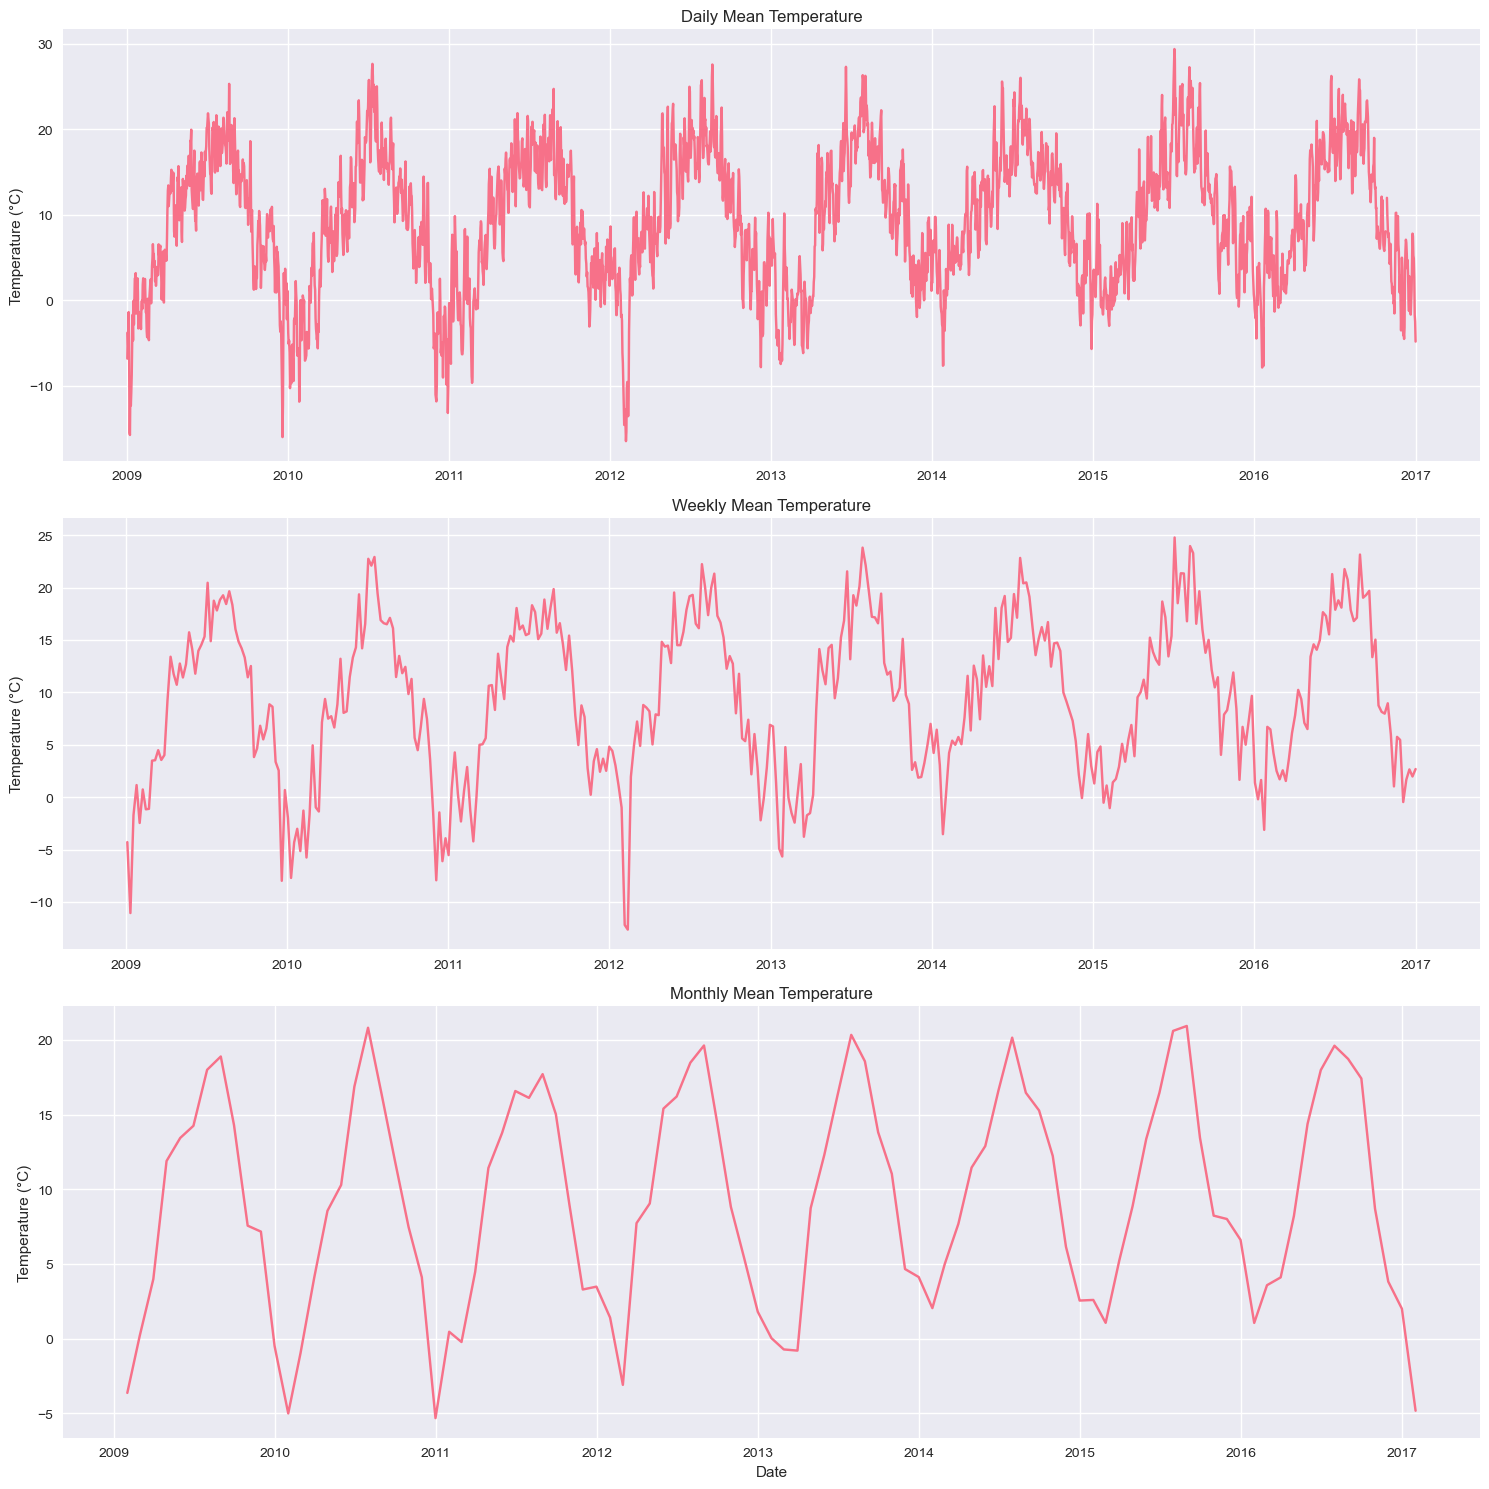

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Daily
axs[0].plot(df_daily.index, df_daily)
axs[0].set_title('Daily Mean Temperature')
axs[0].set_ylabel('Temperature (°C)')

# Weekly
axs[1].plot(df_weekly.index, df_weekly)
axs[1].set_title('Weekly Mean Temperature')
axs[1].set_ylabel('Temperature (°C)')

# Monthly
axs[2].plot(df_monthly.index, df_monthly)
axs[2].set_title('Monthly Mean Temperature')
axs[2].set_ylabel('Temperature (°C)')
axs[2].set_xlabel('Date')

plt.tight_layout()
plt.show()